# Introduction
In this project I will analyze user behavior at a gym where poeple leave(churn).
## Outlines
1. I go over the data file and learn it.
2. Understand the groups & the integrity of my actions throughout the whole procedure.
3. Make decision and recomendations based on it.
### Tasks
I will understand which group is having better retention rates and which one is losing more clients.

### Description of Data Source
The data is built from activities that clients may or may not attend, their time in the gym and on basic information that they share with the gym (such as phone number & gender).

## Table of Contents:
1. Unfolding of the data.
2. Carry out exploratory data analysis.
3. predict user churn.
4. Create user clusters.
5. Conclusions and recommendations.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math as mth
from scipy import stats as st
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

# Step 1

In [3]:
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.columns= df.columns.str.lower()
df.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
df.tail(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3990,1,0,1,0,1,12,0,33,31.771147,8.0,10,1.831577,1.924509,0
3991,1,0,1,0,1,6,0,33,69.301270,6.0,1,1.367289,1.435721,0
3992,0,1,1,1,1,12,0,31,223.102448,8.0,4,3.855916,3.797062,0
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


# Step 1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

The data is intact.

In [6]:
df.describe(include='all')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# Step 2

In [7]:
for i in df[df.duplicated()].columns:
    print(i,':', df[df.duplicated()][i].nunique())

gender : 0
near_location : 0
partner : 0
promo_friends : 0
phone : 0
contract_period : 0
group_visits : 0
age : 0
avg_additional_charges_total : 0
month_to_end_contract : 0
lifetime : 0
avg_class_frequency_total : 0
avg_class_frequency_current_month : 0
churn : 0


In [8]:
df = df.dropna()

It doesn't seems like there are any duplicated data or NA.

In [9]:
df.groupby(['churn'])['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month'].mean()

/tmp/ipykernel_74/2158337864.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['churn'])['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month'].mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


From all features (even phone number)I can see that the people who didnt left are far more serious, know people from the gym and participate in group activities and wth that spend more time and money at the gym.


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

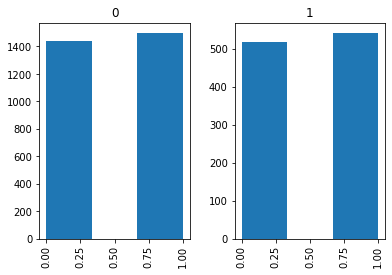

In [10]:
df.hist(column='gender',by='churn',bins = 3)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

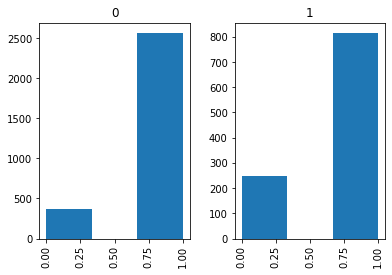

In [11]:
df.hist(column='near_location',by='churn',bins = 3)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

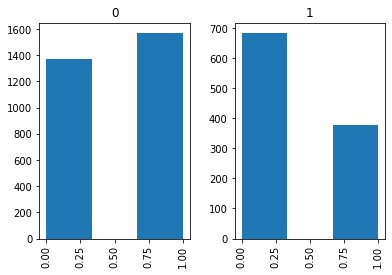

In [12]:
df.hist(column='partner',by='churn',bins = 3)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

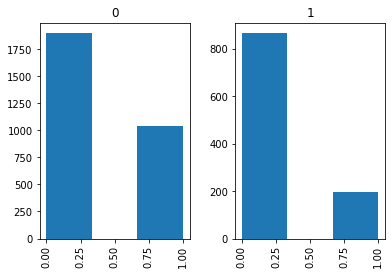

In [13]:
df.hist(column='promo_friends',by='churn',bins = 3)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

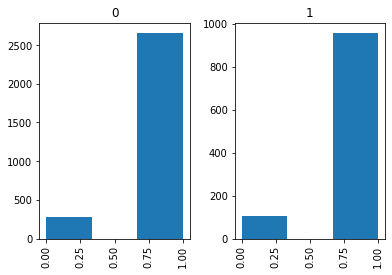

In [14]:
df.hist(column='phone',by='churn',bins = 3)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

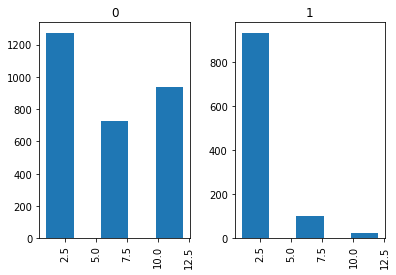

In [15]:
df.hist(column='contract_period',by='churn',bins = 5)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

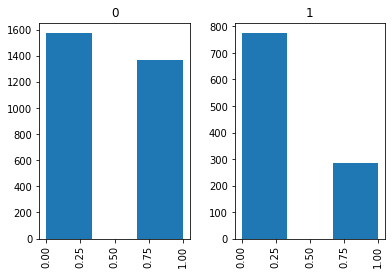

In [16]:
df.hist(column='group_visits',by='churn',bins = 3)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

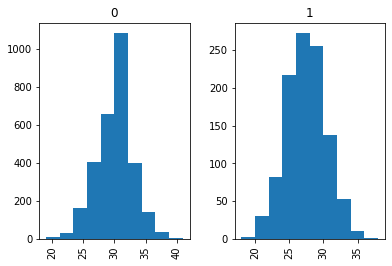

In [17]:
df.hist(column='age',by='churn',bins = 10)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

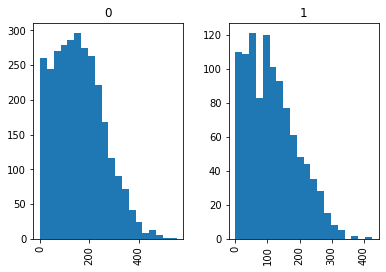

In [18]:
df.hist(column='avg_additional_charges_total',by='churn',bins = 20)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

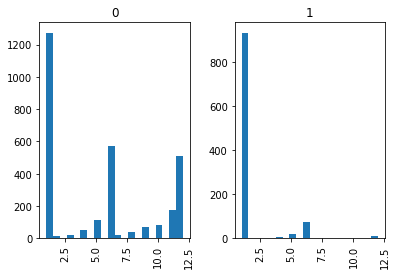

In [19]:
df.hist(column='month_to_end_contract',by='churn',bins = 20)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

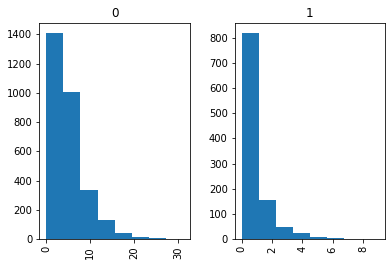

In [20]:
df.hist(column='lifetime',by='churn',bins = 8)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

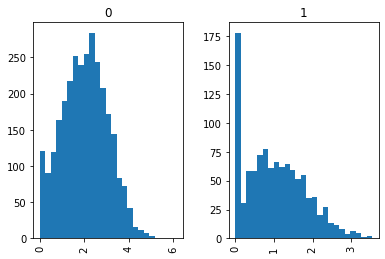

In [21]:
df.hist(column='avg_class_frequency_current_month',by='churn',bins = 25)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

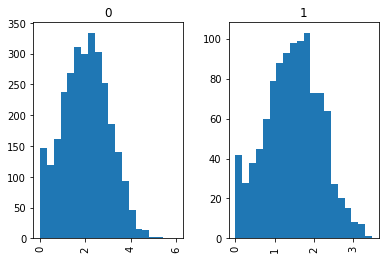

In [22]:
df.hist(column='avg_class_frequency_total',by='churn',bins = 20)

It's much more visible when the graphs show how different it really is and by how much (distribution is an excellent visualisation).

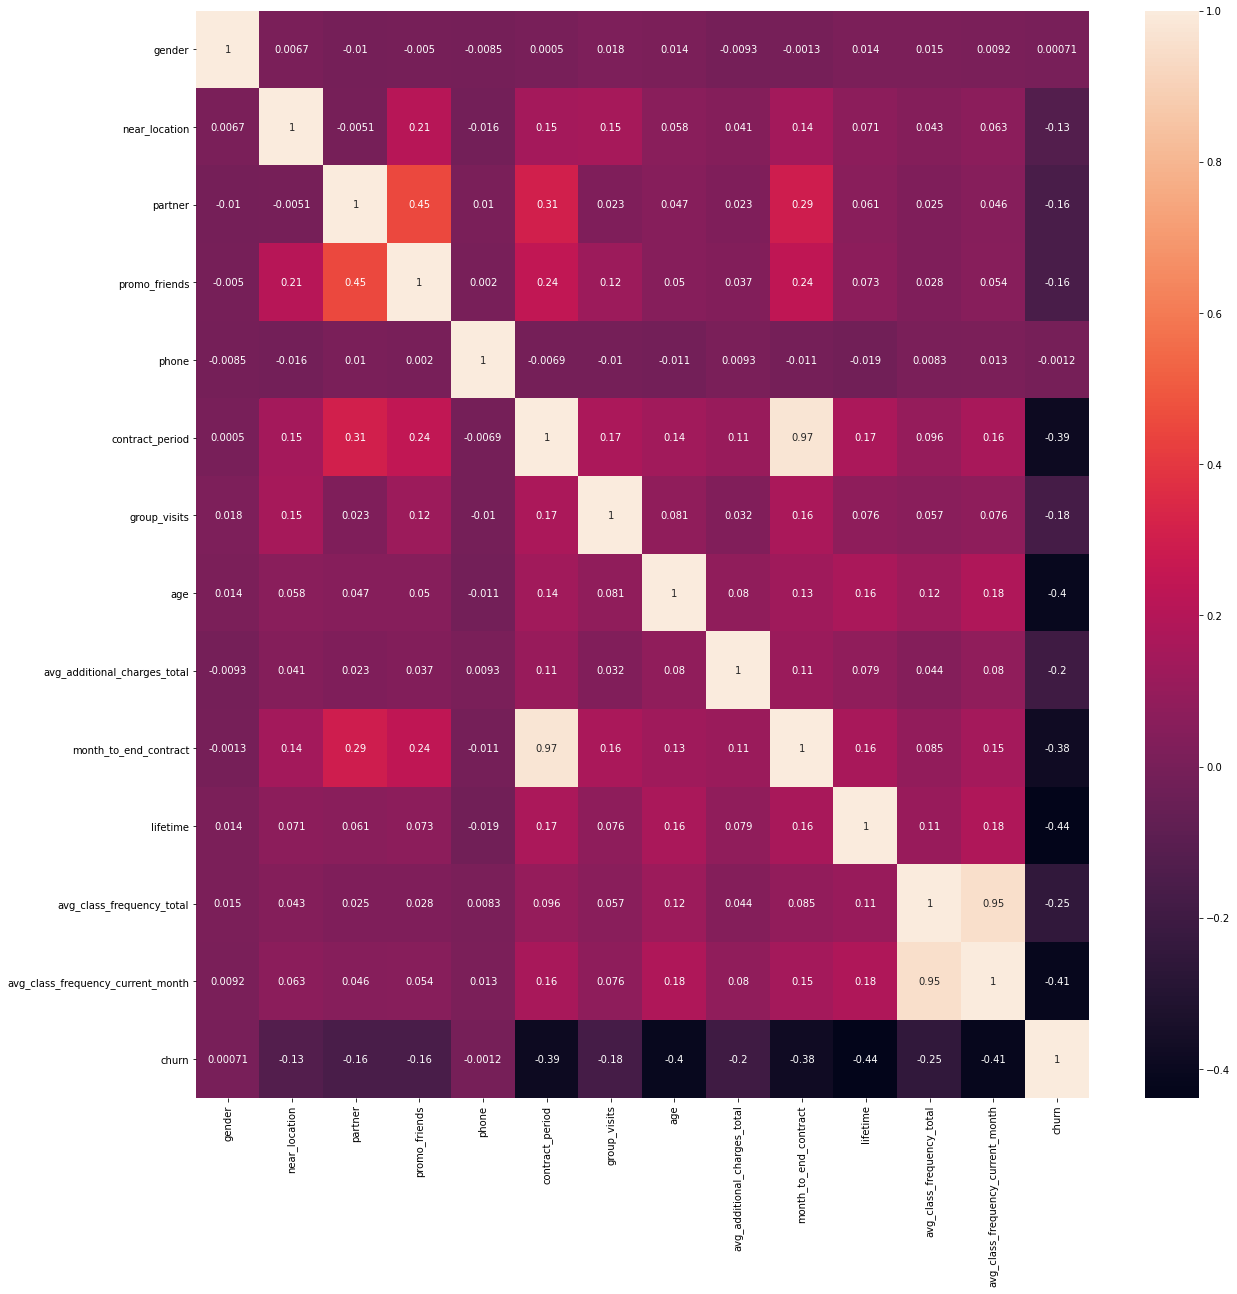

In [23]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sn.heatmap(corr_matrix, annot=True,ax=ax)
plt.show()

The correlation matrix is quite visually impresive, there are correlations that are obvious such as 'partner' and 'promo friends'.but I would say that 'partner' are something I was not expecting to see with such a strong correlation to  'contract period'.

# Step 3

In [24]:
x = df[['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']]
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.2, random_state=0)

In [25]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

In [26]:
lr_model=LogisticRegression(random_state=0)
lr_model.fit(x_train_st,y_train)
lr_predictions = lr_model.predict(x_test_st)
lr_probabilities = lr_model.predict_proba(x_test_st)[:,1]

In [27]:
recall_score(y_test,lr_predictions)

0.8476977567886659

In [28]:
accuracy_score(y_test,lr_predictions)

0.92625

In [29]:
precision_score(y_test,lr_predictions)

0.8703030303030304

In [30]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_probabilities = rf_model.predict_proba(x_test)[:,1]

In [31]:
recall_score(y_test,rf_predictions)

0.7697756788665879

In [32]:
accuracy_score(y_test,rf_predictions)

0.906875

In [33]:
precision_score(y_test,rf_predictions)

0.8635761589403973

LogisticRegression is has the best scores overall and it will be the desired model for my data.

# Step 4

In [34]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
linked = linkage(x_scaler, method = 'ward') 

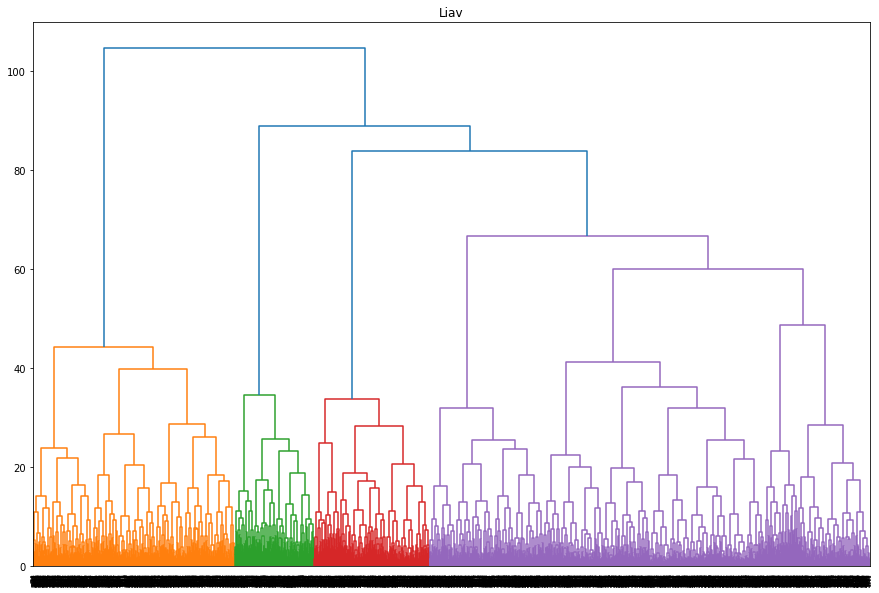

In [35]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Liav')
plt.show() 

I would have changed it to 4 clusters as the dendrogram distributed it to only 4 but not 5 colors. and it seems that a great number of features are clustered together.

In [36]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_scaler)
df['cluster'] = labels
df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.495413,0.000000,0.466055,0.077064,0.915596,2.227523,0.214679,28.484404,133.862709,2.091743,2.788991,1.656393,1.465891,0.449541
1,0.488288,1.000000,0.244144,0.020721,0.902703,1.992793,0.320721,28.202703,130.968468,1.909009,2.396396,1.274996,1.032800,0.526126
2,0.484424,0.998442,0.822430,1.000000,0.900312,3.155763,0.454829,29.218069,141.203442,2.919003,3.705607,1.734352,1.627826,0.247664
3,0.500534,0.945571,0.741729,0.486660,0.899680,11.871932,0.552828,29.933831,164.763165,10.865528,4.695838,2.001331,1.992684,0.022412
4,0.586162,0.971279,0.259791,0.092689,0.903394,2.805483,0.477807,30.159269,162.413891,2.580940,5.143603,2.884331,2.886005,0.067885


the data is now split into 5 groups of similar features in relation to churn. with 2/5 of the groups (0 & 4) are not close to leaving and the rest are with a higher chances of leaving.

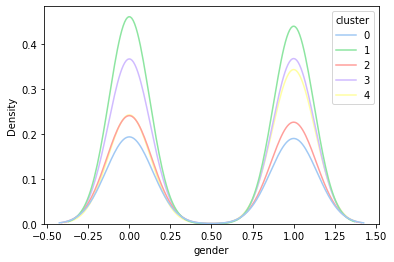

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


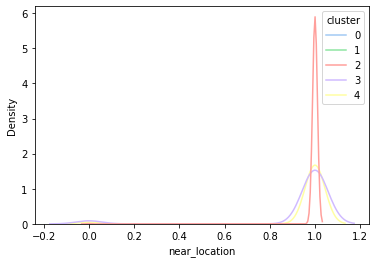

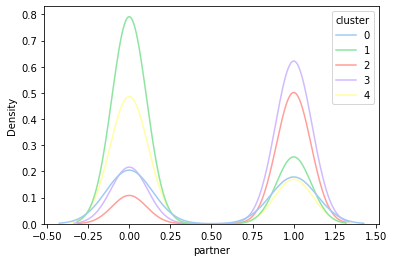

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


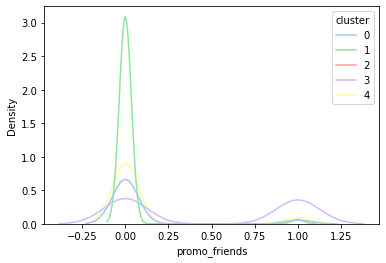

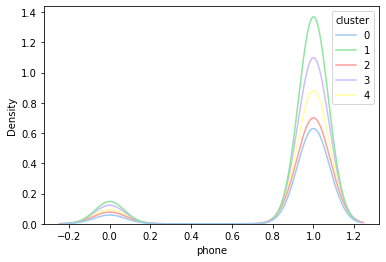

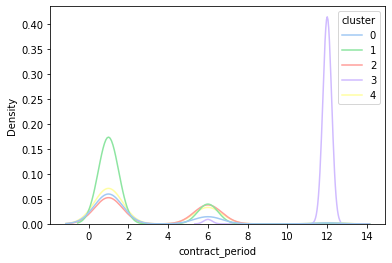

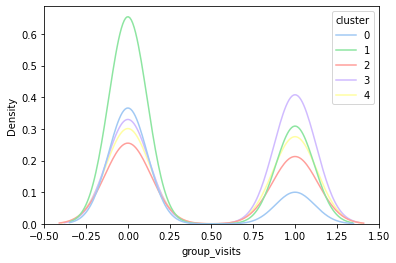

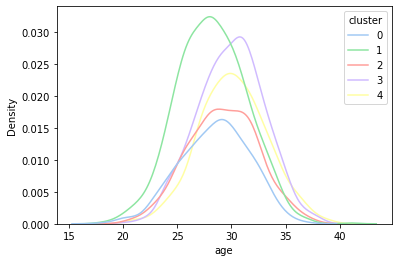

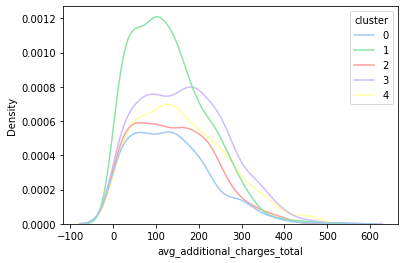

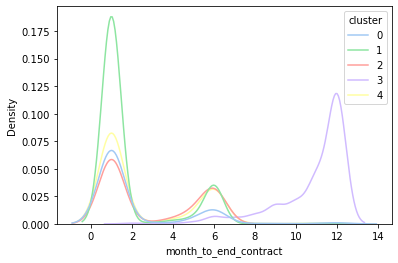

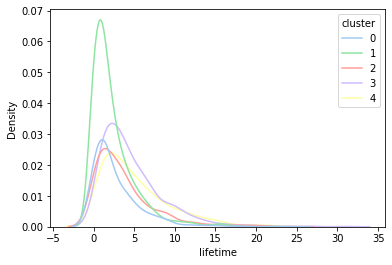

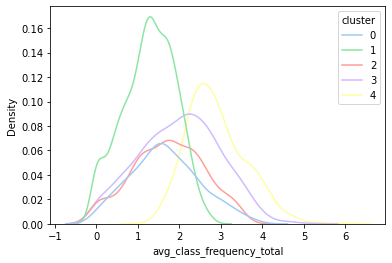

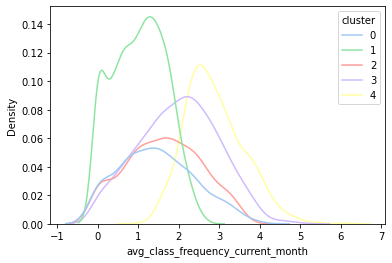

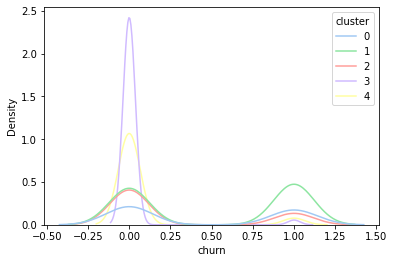

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


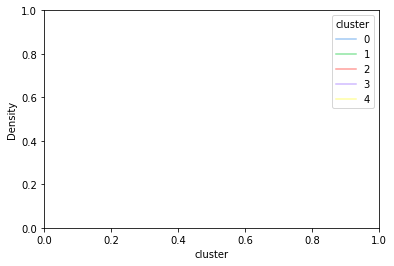

In [37]:
for clu in df:
    sn.kdeplot(
    data=df,
    x=clu,hue='cluster',
    palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3'])
    plt.show()

As it shows, friens, age, group activities, time to end of contract, money spent, proximity and perhaps how they fit at the beggingi of thier time at the gym for the first few month are critical for the 'lifetime' of the customer.

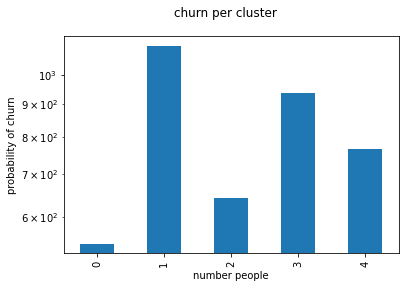

In [38]:
df.groupby(['cluster'])['churn'].count().plot(kind='bar')
plt.suptitle('churn per cluster')
plt.xlabel('number people')
plt.ylabel('probability of churn')
plt.yscale('log')
plt.show()

clusters 3 is at the highest probability of leaving afterwards 4 & 1 which is a bit surprising for there is more indication that 2 is with higher probability.

# Step 5

# Conclusion
After reviewing the whole data, there are some insights such as the number of people who leave the program due to 'loliness' and perhps lack of motivation to continue coming and exercising and with relation to distance people have to travel in order to get to the gym.
I would recomend several steps in order to retain the current customers. First of all asemble greoups of people wiht that are similar in their intension from the workout, so it will boost motivation and eventually promote goin to clsses together. Second, perhaps a nice discount for new comenrs in other services the gym can offer (they will spend more and feel part of the gym). Third, 'younger' and more up to date classes for the younger audiance, for they are more trendy in the activities and mouscle groups that are chik (someday leg workout will be popular). fourth, maybe a small discount for far costumers (can be per kilometer after a certain range such as 15 km). and lastly a better folowup plan for costumers that are about to leave and would stay if there was a discount for end of contract costumers so they will renew they contract.
Another approach can be creating a chat for the gym with sub chats such as 'carpool', 'meaning'.